# **Credit Card Fraud Detection**
This notebook uses Kaggle's Credit Card Transactions Fraud Detection Dataset by kartik2112 to classify fraudulent transactions.

---
Following are the libraries required:
- Numpy
- Pandas
- Matplotlib
- Scipy
- Sklearn
- Pickle

<!------>
> Note: Kaggle's API information to download datasets

## **Import dataset**

Following cell imports the Credit Card Transactions Fraud Detection Kaggle dataset by kartik2112.
<br>
> **You must upload a json file with your kaggle API credentials inorder to import the dataset.**

In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download kartik2112/fraud-detection
!unzip fraud-detection.zip
!rm fraud-detection.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/kartik2112/fraud-detection
License(s): CC0-1.0
 99% 199M/202M [00:07<00:00, 33.9MB/s]
100% 202M/202M [00:07<00:00, 29.0MB/s]
Archive:  fraud-detection.zip
  inflating: fraudTest.csv           
  inflating: fraudTrain.csv          


## **Import requirements**
Following cell imports all the libraries, classes and functions used in the notebook.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

## **Load train data**

Following cell imports the train data and displays first few rows.

In [3]:
train_data = pd.read_csv('fraudTrain.csv', index_col=0)
train_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


## **EDA**

Following few cells perform exploratory data analysis.


### Check unique values

Following cell shows number of unique values in each column.

In [4]:
for col in train_data.columns:
  print(col, train_data[col].nunique())

trans_date_trans_time 1274791
cc_num 983
merchant 693
category 14
amt 52928
first 352
last 481
gender 2
street 983
city 894
state 51
zip 970
lat 968
long 969
city_pop 879
job 494
dob 968
trans_num 1296675
unix_time 1274823
merch_lat 1247805
merch_long 1275745
is_fraud 2


### Check null values

Following cell shows total number of null values in each column

In [5]:
train_data.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

### Check column datatypes

Following cell displays datatype of each column.

In [6]:
train_data.dtypes

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

### Analyze target labels

Following cell displays value counts of each of labels.

In [7]:
train_data.is_fraud.value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

### Analyze categorical columns

Following cell plots pie chart for `gender` and `category` columns.

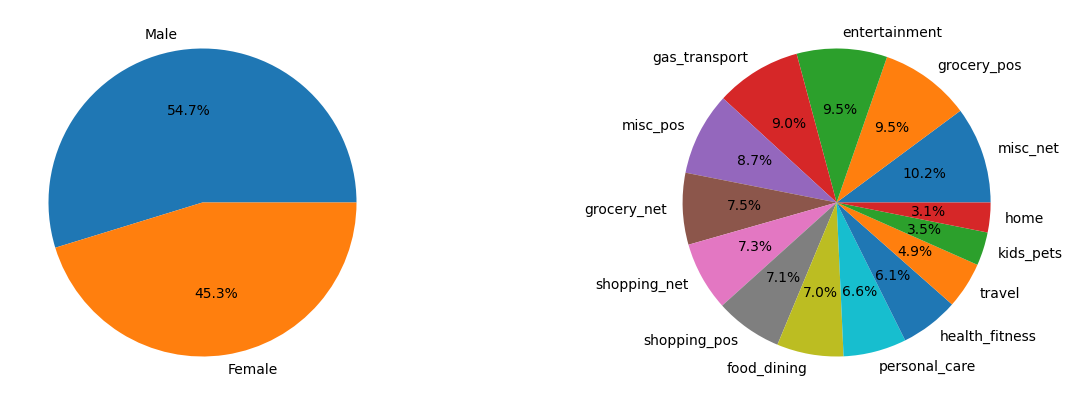

In [8]:
plt.figure(figsize=(15, 5))

## plot 1
plt.subplot(1,2,1)
plt.pie(train_data.gender.value_counts(), labels=['Male', 'Female'], autopct='%1.1f%%')

## plot 2
plt.subplot(1,2,2)
plt.pie(train_data.category.value_counts(), labels = train_data.category.unique(), autopct='%1.1f%%')
plt.show()

### Plot target labels

Following cell plots the target label `is_fraud`.

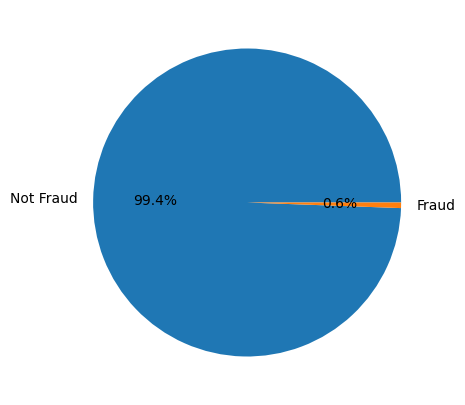

In [9]:
plt.figure(figsize=(10, 5))
plt.pie(train_data.is_fraud.value_counts(), labels=['Not Fraud', 'Fraud'], autopct='%1.1f%%')
plt.show()

### Check duplicates

Following cell displays number of duplicated transcations.

In [10]:
train_data.duplicated(subset = ['trans_num'], keep = False).sum()

0

## **Feature engineering**

Following cells perform feature selection and creation of new features for the model. New features include,

- `age`: Age of the credit card holder at the time of transaction
- `distance`: Distance between place of transaction and credit card holder's address

### Calculate age

Following cell uses transaction time in `trans_date_trans_time` and credit card holder's date of birth in `dob`.

In [11]:
## convert to datetime object
train_data.trans_date_trans_time = pd.to_datetime(train_data.trans_date_trans_time)
train_data.dob = pd.to_datetime(train_data.dob)

## calculate age
train_data['age'] = train_data.trans_date_trans_time.dt.year - train_data.dob.dt.year
train_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,31
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,41
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,57
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,52
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,33


### Calculate distance

Following cell uses longitute and latitude of place of transaction and credit card holder to calculate `distance`.

In [12]:
coordinates = ['lat', 'long', 'merch_lat', 'merch_long']
def dist(row):
  """
  Function to calculate euclidean distance between place of transaction and credit card holder's address
  """
  a = row[0], row[1]
  b = row[2], row[3]
  return euclidean(a, b)
train_data['distance'] = train_data[coordinates].apply(dist, raw = True, axis = 1)
train_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,distance
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,31,0.872830
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,41,0.272310
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,57,0.975845
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,52,0.919802
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,33,0.868505


### Select features

Following cell selects the final features for the model and seprate target  from features. Final features include `category`, `amt`, `gender`, `state`, `city_pop`, `job`, `age`, `distance`.

In [13]:
features = ['category', 'amt', 'gender', 'state', 'city_pop', 'job', 'age','distance',]
target = ['is_fraud']
X_full = train_data[features]
y_full = train_data[target]
X_full.head(), y_full.head

(        category     amt gender state  city_pop  \
 0       misc_net    4.97      F    NC      3495   
 1    grocery_pos  107.23      F    WA       149   
 2  entertainment  220.11      M    ID      4154   
 3  gas_transport   45.00      M    MT      1939   
 4       misc_pos   41.96      M    VA        99   
 
                                  job  age  distance  
 0          Psychologist, counselling   31  0.872830  
 1  Special educational needs teacher   41  0.272310  
 2        Nature conservation officer   57  0.975845  
 3                    Patent attorney   52  0.919802  
 4     Dance movement psychotherapist   33  0.868505  ,
 <bound method NDFrame.head of          is_fraud
 0               0
 1               0
 2               0
 3               0
 4               0
 ...           ...
 1296670         0
 1296671         0
 1296672         0
 1296673         0
 1296674         0
 
 [1296675 rows x 1 columns]>)

## **Preprocessing**
Following cell performs basic preprocessing which include splitting data into train and validation sets, cleaning and encoding categorical values and handaling imbalance

### Train-Validation split

Following cell splits the data into train and validation set. Ratio of train-validation set is 25%.

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X_full, y_full, test_size=0.25, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((972506, 8), (324169, 8), (972506, 1), (324169, 1))

### Reduce unique values in job column

Following cell reduces the number of unique jobs by better genralizing the jobs.

In [15]:
## lower and remove text after ','
X_train.job = X_train.job.apply(lambda x: x.lower().split(',')[0])
X_val.job = X_val.job.apply(lambda x: x.lower().split(',')[0])

## get unique jobs
jobs = X_train.job.unique()
def clean(val):
  """
  Function to merge similar jobs into one
  Example: 'assitant scientist (mathematics)' -> 'scientist'
           (both the job titles are similar so they are converted into one job title)
  """
  ## remove text in brackets
  word = val.split('(')[0].strip()
  ## get last word in job title
  word = word.split(' ')[-1]
  ## return word if word is in jobs, else return val
  if word in jobs:
    return word
  else:
    return val
X_train.job = X_train.job.apply(clean)
X_val.job = X_val.job.apply(clean)
X_train.job.nunique(), X_val.job.nunique()

(282, 281)

### Encode categorical columns

Following cell applies ordinal encoding to categorical columns `category`, `gender`, `state` and `job`.

In [16]:
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
ordinal_encoder.fit(X_train[['category', 'gender', 'state', 'job']])
X_train['category'], X_train['gender'], X_train['state'], X_train['job'] = ordinal_encoder.transform(X_train[['category', 'gender', 'state', 'job']]).transpose()
X_val['category'], X_val['gender'], X_val['state'], X_val['job'] = ordinal_encoder.transform(X_val[['category', 'gender', 'state', 'job']]).transpose()
X_train.category.nunique(), X_train.gender.nunique(), X_train.state.nunique(), X_train.job.nunique()

(14, 2, 51, 282)

### Oversampling

Following cell handles imbalance in the train data by oversampling minority class to 23% of the dataset.

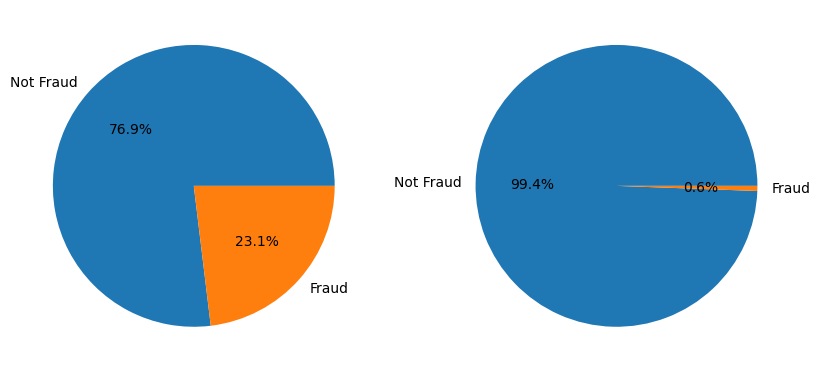

(((1256949, 8), (1256949, 1)), ((324169, 8), (324169, 1)))

In [17]:
## Oversampling using RandomOverSampler
ros = RandomOverSampler(sampling_strategy=0.3, random_state=3)
X_train, y_train = ros.fit_resample(X_train, y_train)

## Check class distribution
plt.figure(figsize=(10, 5))
## Plot 1
plt.subplot(1,2,1)
plt.pie(y_train.is_fraud.value_counts(), labels=['Not Fraud', 'Fraud'], autopct='%1.1f%%')
## Plot 2
plt.subplot(1,2,2)
plt.pie(y_val.is_fraud.value_counts(), labels=['Not Fraud', 'Fraud'], autopct='%1.1f%%')
plt.show()

## Display train and validation set shape
(X_train.shape, y_train.shape), (X_val.shape, y_val.shape)

## **Analyze train data**

Following cells checks the correlation between target and features

### Display column datatypes

Following cell displays datatype of all the columns to ensure every column contains numerical value.

In [18]:
X_train.dtypes

category    float64
amt         float64
gender      float64
state       float64
city_pop      int64
job         float64
age           int32
distance    float64
dtype: object

### Description of train data

Following cell displays basic statistical information about the training data.

In [19]:
X_train.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,category,amt,gender,state,city_pop,job,age,distance
count,1256949.00000,1256949.00000,1256949.00000,1256949.00000,1256949.00000,1256949.00000,1256949.00000,1256949.00000
mean,6.46051,174.23357,0.46299,26.76562,91692.33789,145.89964,46.63197,0.76536
std,3.90595,300.71386,0.49863,14.31459,309771.41670,82.62580,17.75100,0.28402
min,0.00000,1.00000,0.00000,0.00000,23.00000,0.00000,14.00000,0.00024
25%,3.00000,14.18000,0.00000,15.00000,743.00000,81.00000,33.00000,0.56473
50%,6.00000,58.44000,0.00000,28.00000,2518.00000,141.00000,45.00000,0.79683
75%,10.00000,136.34000,1.00000,38.00000,21125.00000,226.00000,58.00000,0.97646
max,13.00000,27390.12000,1.00000,50.00000,2906700.00000,281.00000,96.00000,1.41336


### Target-Feature correlation

Following cell displays correlation between features and target labels.

In [20]:
X_train.corrwith(y_train.is_fraud)

category    0.110248
amt         0.647048
gender      0.040500
state       0.009235
city_pop    0.015892
job        -0.006817
age         0.064555
distance   -0.001208
dtype: float64

## **Build model**

Following cells train and evaluate different models over the training data.

### Training and Evaluation

Following cell describes function `train_evaluate` which is used to train the model on training set and then print its accuracy, f1 score, confusion matrix and classification report.

In [21]:
def train_evaluate(model):

  ## Train
  model.fit(X_train, y_train)
  y_pred = model.predict(X_val)

  ## Evaluate
  print('Accuracy: ', accuracy_score(y_val, y_pred))
  print('F1 Score: ', f1_score(y_val, y_pred))
  print('Confusion Matrix: \n', confusion_matrix(y_val, y_pred))
  print('Classification Report: \n', classification_report(y_val, y_pred))

### Logistic regression

Following cell uses logistic regression to classify fraudulent transactions.

In [22]:
LR = LogisticRegression(random_state = 3)
train_evaluate(LR)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.9774531185893778
F1 Score:  0.22941486557722723
Confusion Matrix: 
 [[315772   6513]
 [   796   1088]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    322285
           1       0.14      0.58      0.23      1884

    accuracy                           0.98    324169
   macro avg       0.57      0.78      0.61    324169
weighted avg       0.99      0.98      0.98    324169



### Decision tree classifier

Following cell uses decision tree classification to classify fraudulent transactions.

In [23]:
DT = DecisionTreeClassifier(random_state = 3)
train_evaluate(DT)

Accuracy:  0.9962612094308833
F1 Score:  0.6695747001090512
Confusion Matrix: 
 [[321729    556]
 [   656   1228]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    322285
           1       0.69      0.65      0.67      1884

    accuracy                           1.00    324169
   macro avg       0.84      0.83      0.83    324169
weighted avg       1.00      1.00      1.00    324169



### Random forest classifier

Following cell uses random forest calssification to classify fraudulent transactions.

In [24]:
RF = RandomForestClassifier(n_estimators=50, random_state = 3)
train_evaluate(RF)

<ipython-input-21-29478082a67f>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Accuracy:  0.9974303526864075
F1 Score:  0.7597346408999134
Confusion Matrix: 
 [[322019    266]
 [   567   1317]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    322285
           1       0.83      0.70      0.76      1884

    accuracy                           1.00    324169
   macro avg       0.92      0.85      0.88    324169
weighted avg       1.00      1.00      1.00    324169



## Select best model

Following cells are used to select the best model and train it on the whole dataset.

### Merge train and validation sets

Following cell merges the train and validation sets.

In [25]:
X_full = pd.concat([X_train, X_val])
y_full = pd.concat([y_train, y_val])
print(X_full.shape)
print(y_full.shape)
X_full.head()

(1581118, 8)
(1581118, 1)


,category,amt,gender,state,city_pop,job,age,distance
0,6.0,152.20,0.0,43.0,5908,209.0,57,0.926920
1,6.0,73.74,0.0,29.0,509,179.0,39,0.833980
2,7.0,81.83,1.0,6.0,370,120.0,57,0.236066
3,1.0,106.98,0.0,43.0,24536,215.0,36,0.775576
4,4.0,116.07,0.0,47.0,149,256.0,41,0.679385


### Train best model

Since random forest classifier had the highest f1 score and accuracy,it out performs the other two. Thus, following cell trains the model on complete training data.

In [26]:
RF.fit(X_full, y_full)

<ipython-input-26-18fb96e1631e>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_full, y_full)


RandomForestClassifier(n_estimators=50, random_state=3)

## **Make predictions**

Following cells make predictions over test data.

### Load test data

Following cell loads the test data from `fraudTest.csv` and displays it's first few rows.

In [27]:
test_data = pd.read_csv('fraudTest.csv', index_col=0)
test_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


### Preprocess test data

Following cell preprocesses the test data for the model.

In [28]:
## calculate `distance`
test_data['distance'] = test_data[coordinates].apply(dist, raw = True, axis = 1)

## calculate `age`
test_data.trans_date_trans_time = pd.to_datetime(test_data.trans_date_trans_time)
test_data.dob = pd.to_datetime(test_data.dob)
test_data['age'] = test_data.trans_date_trans_time.dt.year - test_data.dob.dt.year

## reduce `job`
test_data.job = test_data.job.apply(lambda x: x.lower().split(',')[0])
test_data.job = test_data.job.apply(clean)

## encode `category`, `gender`, `state` and `job`
test_data_full = test_data[features]
test_data_actual = test_data[target]
test_data_full['category'], test_data_full['gender'], test_data_full['state'], test_data_full['job'] = ordinal_encoder.transform(test_data_full[['category', 'gender', 'state', 'job']]).transpose()

test_data_full.head()

<ipython-input-28-1b7c2d8674b8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_full['category'], test_data_full['gender'], test_data_full['state'], test_data_full['job'] = ordinal_encoder.transform(test_data_full[['category', 'gender', 'state', 'job']]).transpose()


,category,amt,gender,state,city_pop,job,age,distance
0,10.0,2.86,1.0,40.0,333497,86.0,52,0.266004
1,10.0,29.84,0.0,44.0,302,236.0,30,0.991674
2,5.0,41.28,0.0,34.0,34496,156.0,50,0.682970
3,9.0,60.05,1.0,9.0,54767,76.0,33,0.250985
4,13.0,3.19,1.0,22.0,1126,76.0,65,1.118816


### Predict and evaluate

Following cell makes predictions over the test data and prints performance metrics.

In [29]:
## Predict
test_pred = RF.predict(test_data_full)

## Evaluate
print('Accuracy: ', accuracy_score(test_data_actual, test_pred))
print('F1 Score: ', f1_score(test_data_actual, test_pred))
print("Classification report:\n", classification_report(test_data_actual, test_pred))

Accuracy:  0.9975185300484597
F1 Score:  0.6255769752918816
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.75      0.54      0.63      2145

    accuracy                           1.00    555719
   macro avg       0.87      0.77      0.81    555719
weighted avg       1.00      1.00      1.00    555719



## **Save the model**

Following cell saves the model into `model.pkl`.

In [30]:
pickle.dump(RF, open('model.pkl', 'wb'))
print('Success')

Success
